In [16]:
import os
import re
import shutil
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# EDA 및 데이터 전처리

In [17]:
ng_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG'
ok_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\OK'

In [18]:
# NG OK 파일의 이미지 파일 개수 확인
ng_images = os.listdir(ng_folder)
ok_images = os.listdir(ok_folder)

ng_count = len(ng_images)
ok_count = len(ok_images)

print(f"NG 이미지 개수: {ng_count}")
print(f"OK 이미지 개수: {ok_count}")

NG 이미지 개수: 1840
OK 이미지 개수: 1298


In [19]:
# 라벨 리스트
labels = sorted(['bichim', 'chui', 'dust', 'dust_Nick', 'eemool', 'Island', 'Ivh', 'LVH', 
                 'miboo', 'miboosik', 'milchack', 'nick', 'Nick', 'Nick_Dust', 'nogwang', 
                 'open', 'Open', 'pinhole', 'pyomyun', 'scratch', 'Scratch', 'short', 'Short'], 
                key=len, reverse=True)

label_count = defaultdict(int)

for image_file in os.listdir(ng_folder):
    cleaned_filename = re.sub(r'[()\s]', '', image_file)

    found = False
    for label in labels:
        if label.lower() in cleaned_filename.lower():
            label_count[label] += 1
            found = True
            break
    
    if not found:
        print(f"라벨이 매칭되지 않은 파일: {image_file}")

for label, count in label_count.items():
    print(f"{label}: {count}개의 이미지 파일")

unlabeled_count = len(os.listdir(ng_folder)) - sum(label_count.values())
print(f"라벨이 없는 이미지 파일: {unlabeled_count}개")

bichim: 8개의 이미지 파일
chui: 2개의 이미지 파일
dust: 402개의 이미지 파일
dust_Nick: 75개의 이미지 파일
eemool: 314개의 이미지 파일
Island: 5개의 이미지 파일
LVH: 36개의 이미지 파일
miboo: 289개의 이미지 파일
miboosik: 11개의 이미지 파일
milchack: 13개의 이미지 파일
nick: 300개의 이미지 파일
Nick_Dust: 28개의 이미지 파일
nogwang: 2개의 이미지 파일
open: 78개의 이미지 파일
pinhole: 11개의 이미지 파일
pyomyun: 3개의 이미지 파일
scratch: 36개의 이미지 파일
short: 227개의 이미지 파일
라벨이 없는 이미지 파일: 0개


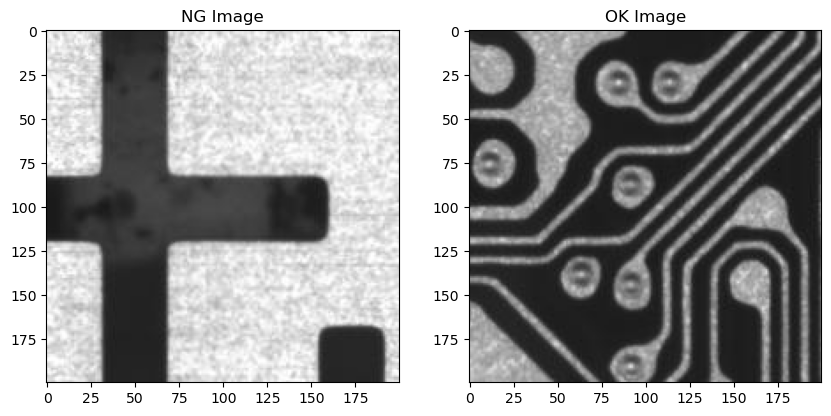

In [20]:
# 첫 번째 NG OK 이미지 확인
ng_image_path = os.path.join(ng_folder, ng_images[0])
ok_image_path = os.path.join(ok_folder, ok_images[0])

ng_image = Image.open(ng_image_path)
ok_image = Image.open(ok_image_path)

# NG와 OK 이미지 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(ng_image, cmap='gray')
plt.title('NG Image')

plt.subplot(1, 2, 2)
plt.imshow(ok_image, cmap='gray')
plt.title('OK Image')

plt.show()

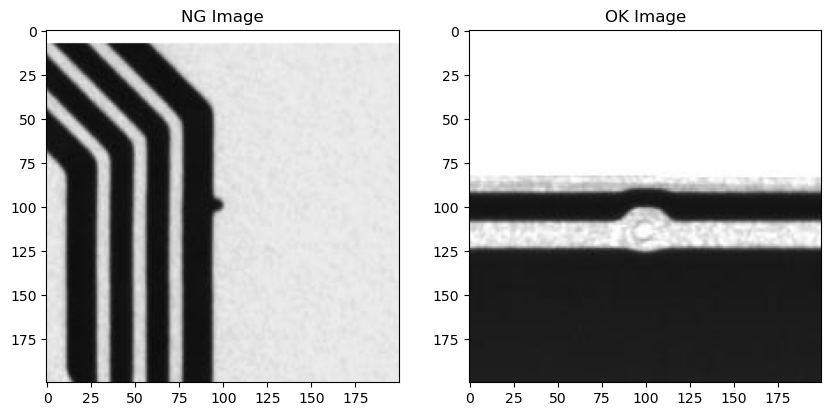

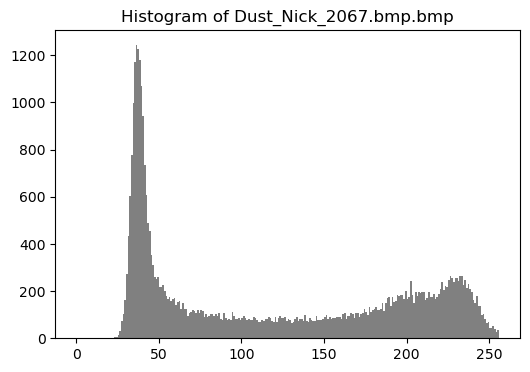

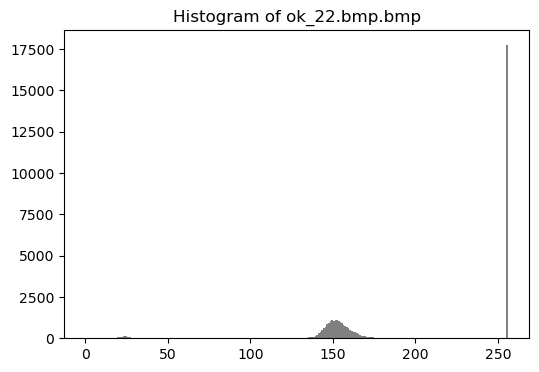

In [21]:
# 무작위 NG OK 이미지 선택
def show_random_images(ng_images, ok_images, ng_folder, ok_folder):
    ng_image = Image.open(os.path.join(ng_folder, np.random.choice(ng_images)))
    ok_image = Image.open(os.path.join(ok_folder, np.random.choice(ok_images)))

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(ng_image, cmap='gray')
    plt.title('NG Image')
    plt.subplot(1, 2, 2)
    plt.imshow(ok_image, cmap='gray')
    plt.title('OK Image')

    plt.show()

# 이미지 밝기 히스토그램
def plot_image_histogram(image_path):
    image = Image.open(image_path).convert('L')  # 흑백으로 변환
    image_array = np.array(image)
    
    plt.figure(figsize=(6, 4))
    plt.hist(image_array.ravel(), bins=256, range=(0, 256), color='gray')
    plt.title(f"Histogram of {os.path.basename(image_path)}")
    plt.show()

# 무작위 NG OK 이미지 히스토그램
show_random_images(ng_images, ok_images, ng_folder, ok_folder)
plot_image_histogram(os.path.join(ng_folder, np.random.choice(ng_images)))
plot_image_histogram(os.path.join(ok_folder, np.random.choice(ok_images)))

In [22]:
ng_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG'
ng_newlabel_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_newlabel'

os.makedirs(ng_newlabel_folder, exist_ok=True)

label_mappings = {
    'nick_dust': 'nick_dust',
    'dust_nick': 'nick_dust',
    'island': 'island',
    'bichim': 'bichim',
    'chui': 'chui',
    'dust': 'dust',
    'eemool': 'eemool',
    'ivh': 'ivh',
    'lvh': 'ivh',
    'miboo': 'miboosik',
    'miboosik': 'miboosik',
    'milchack': 'milchack',
    'nick': 'nick',
    'nogwang': 'nogwang',
    'open': 'open',
    'pinhole': 'pinhole',
    'pyomyun': 'pyomyun',
    'scratch': 'scratch',
    'short': 'short'
}

def rename_files_in_folder(folder_path, new_folder, label_mappings):
    label_counters = {label: 1 for label in label_mappings.values()}

    for image_file in os.listdir(folder_path):
        original_file_path = os.path.join(folder_path, image_file)

        cleaned_filename = re.sub(r'[()\s]', '', image_file).lower()

        file_name, file_ext = os.path.splitext(cleaned_filename)

        for original_label, new_label in label_mappings.items():
            if original_label.lower() in file_name:
                new_file_name = f"{new_label}_{label_counters[new_label]}{file_ext}"
                new_file_path = os.path.join(new_folder, new_file_name)

                shutil.copy2(original_file_path, new_file_path)
                print(f"파일 복사 및 이름 변경: {image_file} -> {new_file_name}")

                label_counters[new_label] += 1
                break

rename_files_in_folder(ng_folder, ng_newlabel_folder, label_mappings)


파일 복사 및 이름 변경: bichim (1).bmp.bmp -> bichim_1.bmp
파일 복사 및 이름 변경: bichim (2).bmp.bmp -> bichim_2.bmp
파일 복사 및 이름 변경: bichim (3).bmp.bmp -> bichim_3.bmp
파일 복사 및 이름 변경: bichim (4).bmp.bmp -> bichim_4.bmp
파일 복사 및 이름 변경: bichim (5).bmp.bmp -> bichim_5.bmp
파일 복사 및 이름 변경: bichim (6).bmp.bmp -> bichim_6.bmp
파일 복사 및 이름 변경: bichim (7).bmp.bmp -> bichim_7.bmp
파일 복사 및 이름 변경: bichim (8).bmp.bmp -> bichim_8.bmp
파일 복사 및 이름 변경: chui (1).bmp.bmp -> chui_1.bmp
파일 복사 및 이름 변경: chui (2).bmp.bmp -> chui_2.bmp
파일 복사 및 이름 변경: dust (1).bmp.bmp -> dust_1.bmp
파일 복사 및 이름 변경: dust (10).bmp.bmp -> dust_2.bmp
파일 복사 및 이름 변경: dust (100).bmp.bmp -> dust_3.bmp
파일 복사 및 이름 변경: dust (101).bmp.bmp -> dust_4.bmp
파일 복사 및 이름 변경: dust (103).bmp.bmp -> dust_5.bmp
파일 복사 및 이름 변경: dust (105).bmp.bmp -> dust_6.bmp
파일 복사 및 이름 변경: dust (106).bmp.bmp -> dust_7.bmp
파일 복사 및 이름 변경: dust (107).bmp.bmp -> dust_8.bmp
파일 복사 및 이름 변경: dust (11).bmp.bmp -> dust_9.bmp
파일 복사 및 이름 변경: dust (110).bmp.bmp -> dust_10.bmp
파일 복사 및 이름 변경: dust (111).bmp.b

In [23]:
# 라벨 리스트
labels = sorted(['bichim', 'chui', 'dust', 'dust_Nick', 'eemool', 'Island', 'Ivh', 'LVH', 
                 'miboo', 'miboosik', 'milchack', 'nick', 'Nick', 'Nick_Dust', 'nogwang', 
                 'open', 'Open', 'pinhole', 'pyomyun', 'scratch', 'Scratch', 'short', 'Short'], 
                key=len, reverse=True)

label_count = defaultdict(int)

for image_file in os.listdir(ng_newlabel_folder):
    cleaned_filename = re.sub(r'[()\s]', '', image_file)

    found = False
    for label in labels:
        if label.lower() in cleaned_filename.lower():
            label_count[label] += 1
            found = True
            break
    
    if not found:
        print(f"라벨이 매칭되지 않은 파일: {image_file}")

for label, count in label_count.items():
    print(f"{label}: {count}개의 이미지 파일")

unlabeled_count = len(os.listdir(ng_folder)) - sum(label_count.values())
print(f"라벨이 없는 이미지 파일: {unlabeled_count}개")

bichim: 8개의 이미지 파일
chui: 2개의 이미지 파일
dust: 402개의 이미지 파일
eemool: 314개의 이미지 파일
Island: 5개의 이미지 파일
Ivh: 36개의 이미지 파일
miboosik: 300개의 이미지 파일
milchack: 13개의 이미지 파일
nick: 300개의 이미지 파일
Nick_Dust: 103개의 이미지 파일
nogwang: 2개의 이미지 파일
open: 78개의 이미지 파일
pinhole: 11개의 이미지 파일
pyomyun: 3개의 이미지 파일
scratch: 36개의 이미지 파일
short: 227개의 이미지 파일
라벨이 없는 이미지 파일: 0개


In [24]:
# 이미지 크기 확인 함수
def check_image_sizes(folder_path):
    image_sizes = []
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            with Image.open(image_path) as img:
                image_sizes.append(img.size)
        except Exception as e:
            print(f"Error opening {image_file}: {e}")

    unique_sizes = set(image_sizes)
    print(f"폴더 '{folder_path}'의 고유한 이미지 크기: {unique_sizes}")
    
    if len(unique_sizes) == 1:
        print(f"모든 이미지의 크기가 동일합니다: {unique_sizes.pop()}")
    else:
        print(f"서로 다른 크기의 이미지가 있습니다. 고유 크기 목록: {unique_sizes}")

print("NG 이미지 크기 확인:")
check_image_sizes(ng_newlabel_folder)

print("\nOK 이미지 크기 확인:")
check_image_sizes(ok_folder)


NG 이미지 크기 확인:
폴더 'C:\Users\kimhyunju\Desktop\PCB_classify\NG_newlabel'의 고유한 이미지 크기: {(159, 200), (200, 172), (199, 200), (200, 165), (183, 200), (200, 200), (178, 200), (161, 200), (174, 200), (199, 199), (200, 180), (200, 199), (200, 154), (200, 189), (200, 179), (200, 185)}
서로 다른 크기의 이미지가 있습니다. 고유 크기 목록: {(159, 200), (200, 172), (199, 200), (200, 165), (183, 200), (200, 200), (178, 200), (161, 200), (174, 200), (199, 199), (200, 180), (200, 199), (200, 154), (200, 189), (200, 179), (200, 185)}

OK 이미지 크기 확인:
폴더 'C:\Users\kimhyunju\Desktop\PCB_classify\OK'의 고유한 이미지 크기: {(200, 194), (166, 200), (199, 200), (194, 200), (178, 200), (200, 200), (195, 200), (168, 200), (161, 200), (199, 199), (200, 193), (200, 199), (200, 169)}
서로 다른 크기의 이미지가 있습니다. 고유 크기 목록: {(200, 194), (166, 200), (199, 200), (194, 200), (178, 200), (200, 200), (195, 200), (168, 200), (161, 200), (199, 199), (200, 193), (200, 199), (200, 169)}


In [25]:
# 결과를 저장할 폴더 경로 설정
ng_resized_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_resized'
ok_resized_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\OK_resized\normal'

# 저장할 폴더가 없으면 생성
os.makedirs(ng_resized_folder, exist_ok=True)
os.makedirs(ok_resized_folder, exist_ok=True)

# 이미지 크기 변경 함수
def resize_images(input_folder, output_folder, target_size=(224, 224)):
    for image_file in os.listdir(input_folder):
        image_path = os.path.join(input_folder, image_file)
        output_path = os.path.join(output_folder, image_file)
        
        try:
            with Image.open(image_path) as img:
                resized_img = img.resize(target_size)
                resized_img.save(output_path)
                print(f"이미지 {image_file}이(가) {target_size} 크기로 저장되었습니다.")
        
        except Exception as e:
            print(f"Error processing {image_file}: {e}")

print("NG_newlabel 이미지 크기 변경 중...")
resize_images(ng_newlabel_folder, ng_resized_folder)

print("OK 이미지 크기 변경 중...")
resize_images(ok_folder, ok_resized_folder)

print("모든 이미지 크기 변경이 완료되었습니다.")

NG_newlabel 이미지 크기 변경 중...
이미지 bichim_1.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 bichim_2.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 bichim_3.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 bichim_4.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 bichim_5.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 bichim_6.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 bichim_7.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 bichim_8.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 chui_1.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 chui_2.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 dust_1.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 dust_10.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 dust_100.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 dust_101.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 dust_102.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 dust_103.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 dust_104.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 dust_105.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 dust_106.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 dust_107.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 dust_108.bmp이(가) (224, 224) 크기로 저장되었습니다.
이미지 dust_109.bmp이(가) (224, 224) 크기로

In [26]:
# 파일명 정리
import os
import shutil

resized_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_resized'
sorted_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'

os.makedirs(sorted_dir, exist_ok=True)

# NG_nl_resized 폴더에서 파일들을 불러오기
for filename in os.listdir(resized_dir):
    if filename.endswith('.bmp'):
        # 라벨 추출: 마지막 언더바(_) 뒤의 숫자를 제외하고 라벨만 추출
        label = '_'.join(filename.split('_')[:-1])

        label_folder = os.path.join(sorted_dir, label)
        os.makedirs(label_folder, exist_ok=True)

        source_path = os.path.join(resized_dir, filename)
        destination_path = os.path.join(label_folder, filename)
        
        # 파일을 이동시키지 않고 복사하여 데이터가 삭제되지 않도록 수정
        shutil.copy2(source_path, destination_path)

        print(f"{filename} -> {label_folder}")
        
print("모든 파일이 라벨별로 정리되었습니다.")

bichim_1.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\bichim
bichim_2.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\bichim
bichim_3.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\bichim
bichim_4.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\bichim
bichim_5.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\bichim
bichim_6.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\bichim
bichim_7.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\bichim
bichim_8.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\bichim
chui_1.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\chui
chui_2.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\chui
dust_1.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\dust
dust_10.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\dust
dust_100.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\dust
dust_101.bmp -> C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\du

In [28]:
# 이미지 밝기 확인 및 정규화
import os
from PIL import Image, ImageStat
import numpy as np
import cv2

def calculate_brightness(image):
    grayscale_image = image.convert('L')
    stat = ImageStat.Stat(grayscale_image)
    return stat.mean[0]

def check_image_brightness(folder_path):
    brightness_values = []
    image_paths = []
    
    for root, _, files in os.walk(folder_path):
        for image_file in files:
            image_path = os.path.join(root, image_file)
            try:
                with Image.open(image_path) as img:
                    brightness = calculate_brightness(img)
                    brightness_values.append(brightness)
                    image_paths.append(image_path)
            except Exception as e:
                print(f"Error opening {image_file}: {e}")

    # 평균 밝기와 표준편차 계산
    if brightness_values:
        brightness_mean = np.mean(brightness_values)
        brightness_std = np.std(brightness_values)
        print(f"폴더 '{folder_path}'의 평균 밝기: {brightness_mean:.2f}")
        print(f"폴더 '{folder_path}'의 밝기 표준편차: {brightness_std:.2f}")
    else:
        print(f"폴더 '{folder_path}'에서 이미지를 찾을 수 없습니다.")
        return []
    
    # 이상치로 간주할 범위 (평균 ± 2 표준편차 이상 차이나는 이미지)
    lower_bound = brightness_mean - 2 * brightness_std
    upper_bound = brightness_mean + 2 * brightness_std
    
    abnormal_files = []
    print("\n이상 밝기 이미지를 확인합니다:")
    for img_file, brightness in zip(image_paths, brightness_values):
        if brightness < lower_bound or brightness > upper_bound:
            print(f"파일: {img_file}, 밝기: {brightness:.2f}")
            abnormal_files.append(img_file)
    
    return abnormal_files

def normalize_brightness(image, target_brightness=127.32):
    image = np.array(image)
    current_brightness = np.mean(image)
    
    # 현재 밝기와 목표 밝기의 비율을 계산하여 밝기 조정
    brightness_factor = target_brightness / current_brightness
    image = np.clip(image * brightness_factor, 0, 255).astype(np.uint8)
    
    return Image.fromarray(image)

# 이상 밝기 이미지를 정규화
def process_abnormal_brightness_images(folder_path, abnormal_files, target_brightness=127.32):
    for image_path in abnormal_files:
        with Image.open(image_path) as img:
            normalized_img = normalize_brightness(img, target_brightness)
            normalized_img.save(image_path)
            print(f"{os.path.basename(image_path)}의 밝기를 정규화했습니다.")

    print("모든 이상 밝기 이미지가 정규화되었습니다.")

ng_newlabel_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'

print("NG 이미지 밝기 확인:")
abnormal_files = check_image_brightness(ng_newlabel_folder)

if abnormal_files:
    process_abnormal_brightness_images(ng_newlabel_folder, abnormal_files)
else:
    print("이상 밝기 이미지를 찾지 못했습니다.")



NG 이미지 밝기 확인:
폴더 'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'의 평균 밝기: 127.32
폴더 'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'의 밝기 표준편차: 35.54

이상 밝기 이미지를 확인합니다:
파일: C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\bichim\bichim_8.bmp, 밝기: 210.67
파일: C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\dust\dust_103.bmp, 밝기: 212.82
파일: C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\dust\dust_104.bmp, 밝기: 205.75
파일: C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\dust\dust_105.bmp, 밝기: 218.08
파일: C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\dust\dust_11.bmp, 밝기: 203.16
파일: C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\dust\dust_112.bmp, 밝기: 233.97
파일: C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\dust\dust_117.bmp, 밝기: 199.04
파일: C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\dust\dust_125.bmp, 밝기: 210.18
파일: C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\dust\dust_142.bmp, 밝기: 221.26
파일: C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted\dust\dust_144.b

In [29]:
# 이상 밝기 정규화 후 개선 여부 확인
import os
from PIL import Image, ImageStat
import numpy as np

def calculate_brightness(image):
    grayscale_image = image.convert('L')
    stat = ImageStat.Stat(grayscale_image)
    return stat.mean[0]

def calculate_brightness_stats(folder_path):
    brightness_values = []
    
    for root, _, files in os.walk(folder_path):
        for image_file in files:
            image_path = os.path.join(root, image_file)
            try:
                with Image.open(image_path) as img:
                    brightness = calculate_brightness(img)
                    brightness_values.append(brightness)
            except Exception as e:
                print(f"Error opening {image_file}: {e}")

    if brightness_values:
        brightness_mean = np.mean(brightness_values)
        brightness_std = np.std(brightness_values)
        print(f"폴더 '{folder_path}'의 평균 밝기: {brightness_mean:.2f}")
        print(f"폴더 '{folder_path}'의 밝기 표준편차: {brightness_std:.2f}")
    else:
        print(f"폴더 '{folder_path}'에서 이미지를 찾을 수 없습니다.")

ng_newlabel_folder = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'

print("NG 이미지 평균 밝기 및 표준편차 계산:")
calculate_brightness_stats(ng_newlabel_folder)


NG 이미지 평균 밝기 및 표준편차 계산:
폴더 'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'의 평균 밝기: 123.77
폴더 'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'의 밝기 표준편차: 30.47


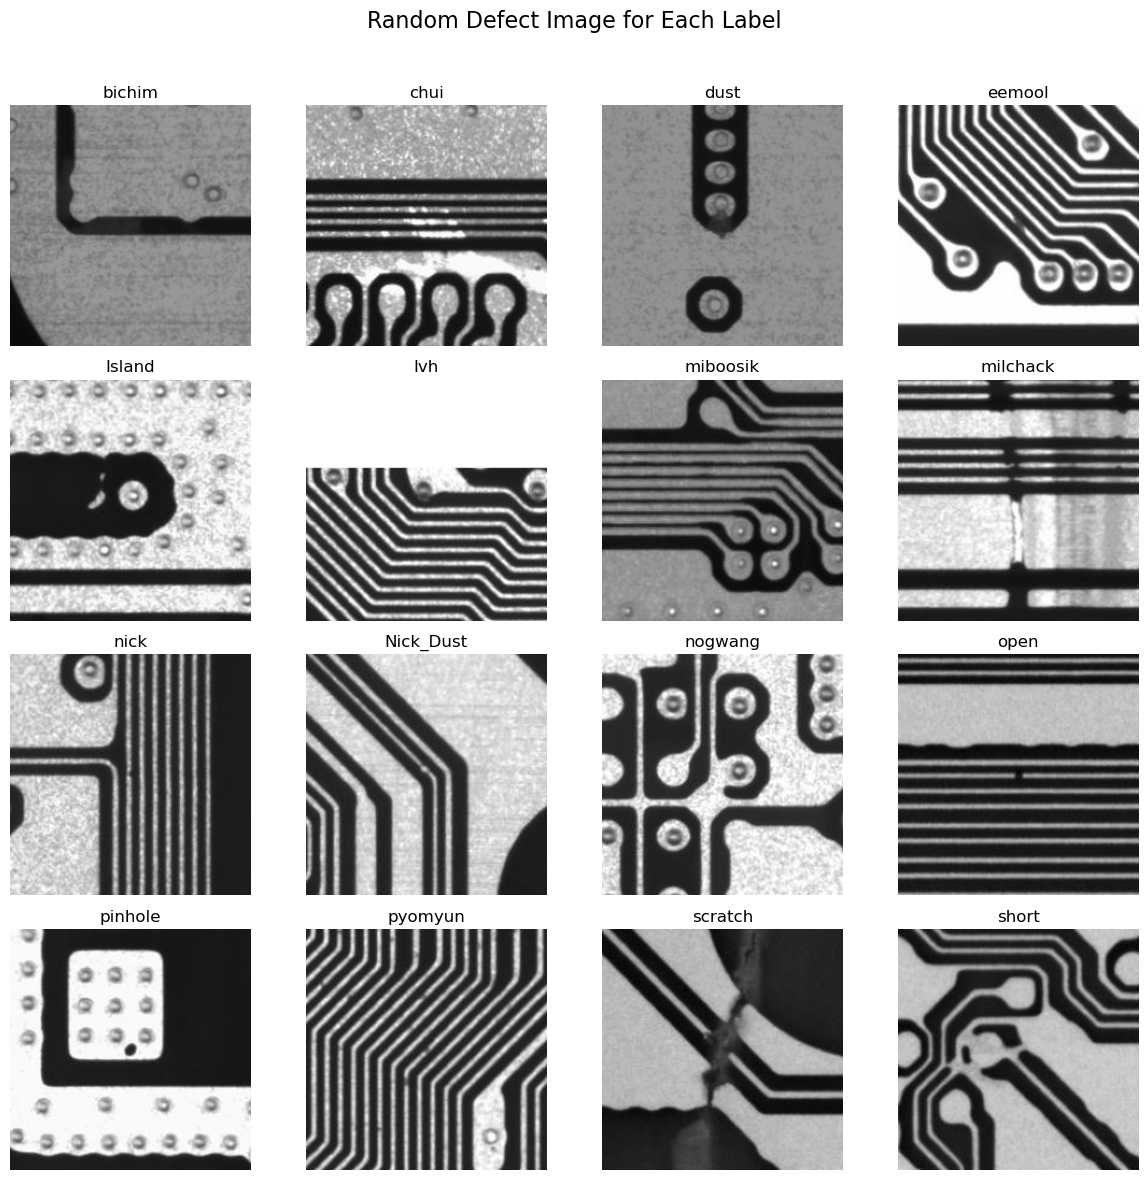

In [32]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

ng_resized_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'

labels = ['bichim', 'chui', 'dust', 'eemool', 'Island', 'Ivh', 'miboosik', 'milchack', 
          'nick', 'Nick_Dust', 'nogwang', 'open', 'pinhole', 'pyomyun', 'scratch', 'short']

# 각 라벨에 해당하는 하위 폴더에서 이미지를 선택
def get_random_image_for_label(label):
    label_folder = os.path.join(ng_resized_dir, label)  # 각 라벨에 해당하는 폴더로 이동
    if not os.path.exists(label_folder):
        print(f"No folder found for label: {label}")
        return None

    image_files = [f for f in os.listdir(label_folder) if f.endswith('.bmp')]

    if len(image_files) == 0:
        print(f"No images found for label: {label}")
        return None

    # 랜덤으로 이미지를 선택
    random_image_file = random.choice(image_files)
    image_path = os.path.join(label_folder, random_image_file)
    image = Image.open(image_path)
    return image

def visualize_random_images_for_all_labels(labels):
    num_cols = 4
    num_rows = int(np.ceil(len(labels) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
    fig.suptitle('Random Defect Image for Each Label', fontsize=16)

    for i, label in enumerate(labels):
        row = i // num_cols
        col = i % num_cols

        random_image = get_random_image_for_label(label)

        if random_image is not None:
            axes[row, col].imshow(random_image)
            axes[row, col].set_title(label)
            axes[row, col].axis('off')
        else:
            axes[row, col].set_title(f"{label} (No Images)")
            axes[row, col].axis('off')

    for i in range(len(labels), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

visualize_random_images_for_all_labels(labels)


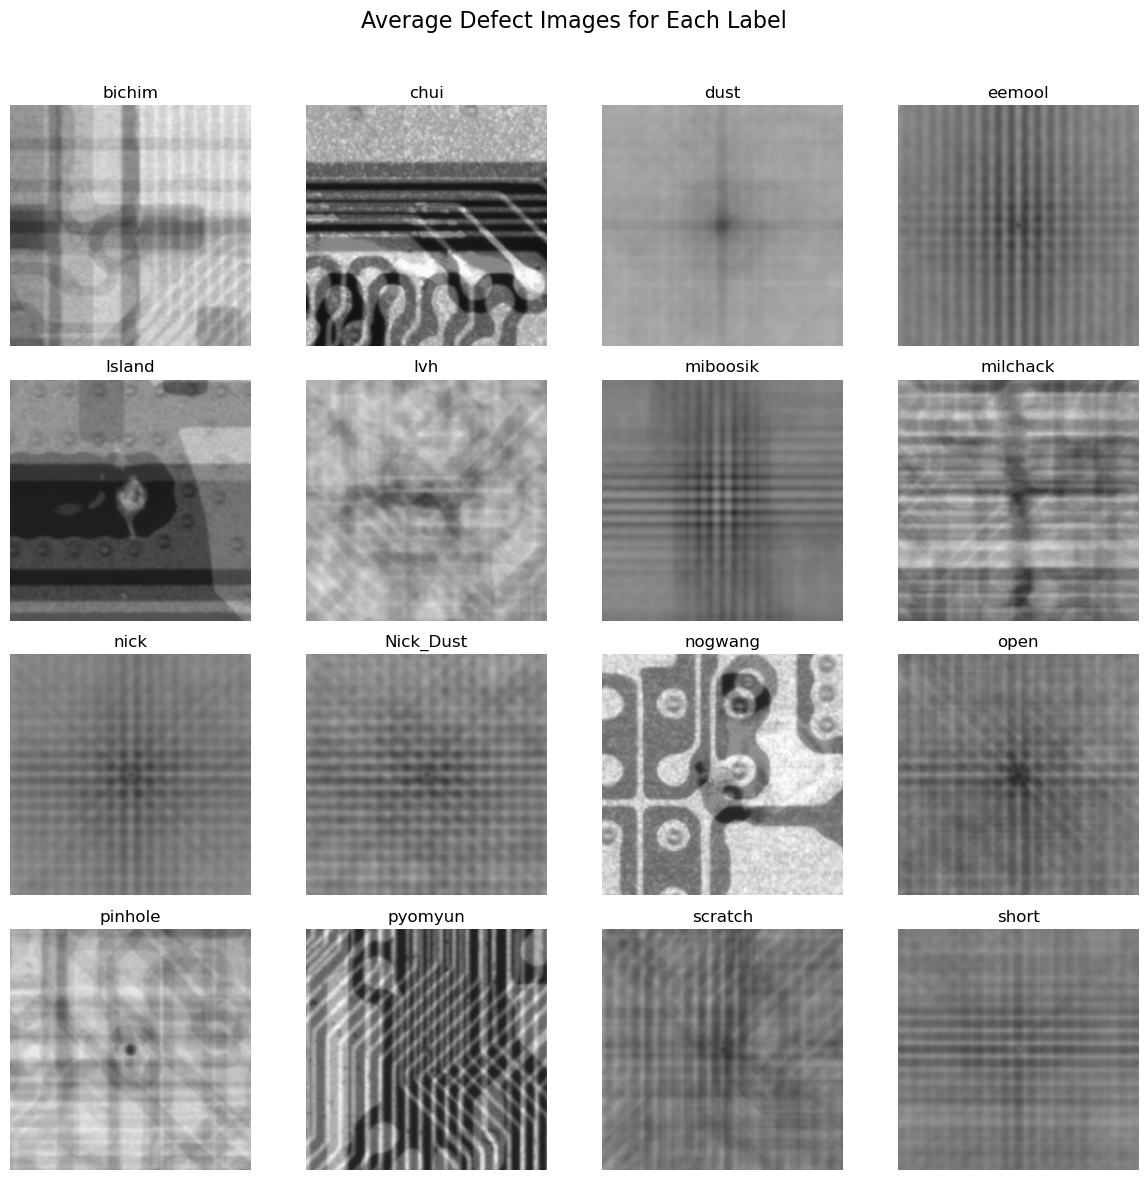

In [11]:
# 결함 유형별 평균 이미지 시각화
ng_resized_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'

labels = ['bichim', 'chui', 'dust', 'eemool', 'Island', 'Ivh', 'miboosik', 'milchack', 
          'nick', 'Nick_Dust', 'nogwang', 'open', 'pinhole', 'pyomyun', 'scratch', 'short']

def calculate_average_image_for_label(label):
    image_files = [f for f in os.listdir(ng_resized_dir) if f.lower().startswith(f'{label.lower()}_') and f.endswith('.bmp')]

    if len(image_files) == 0:
        print(f"No images found for label: {label}")
        return None

    average_image = None

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(ng_resized_dir, image_file)
        image = np.array(Image.open(image_path).convert('RGB')).astype(np.float32)
        
        if average_image is None:
            average_image = np.zeros_like(image)

        average_image += image

    average_image /= len(image_files)
    return average_image

def visualize_average_images_for_all_labels(labels):
    num_cols = 4
    num_rows = int(np.ceil(len(labels) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
    fig.suptitle('Average Defect Images for Each Label', fontsize=16)

    for i, label in enumerate(labels):
        row = i // num_cols
        col = i % num_cols

        average_image = calculate_average_image_for_label(label)

        if average_image is not None:
            axes[row, col].imshow(average_image.astype(np.uint8))
            axes[row, col].set_title(label)
            axes[row, col].axis('off')
        else:
            axes[row, col].set_title(f"{label} (No Images)")
            axes[row, col].axis('off')

    for i in range(len(labels), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

visualize_average_images_for_all_labels(labels)


In [13]:
import torch
torch.cuda.empty_cache()

In [13]:
# # TransGAN으로 데이터 증강 시도
# import os
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import datasets, transforms
# from torch.utils.data import DataLoader
# from timm.models.vision_transformer import VisionTransformer
# from PIL import Image
# import numpy as np

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5])
# ])

# data_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'
# augmented_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_augmented'

# dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)
# train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# class TransGAN_Generator(nn.Module):
#     def __init__(self, img_size=224, latent_dim=100):
#         super(TransGAN_Generator, self).__init__()
#         self.latent_dim = latent_dim
#         self.fc = nn.Sequential(
#             nn.Linear(latent_dim, 768),
#             nn.ReLU(),
#             nn.Linear(768, img_size * img_size * 3),
#             nn.Tanh()
#         )

#     def forward(self, z):
#         x = self.fc(z)
#         x = x.view(-1, 3, 224, 224)
#         return x

# class TransGAN_Discriminator(nn.Module):
#     def __init__(self, img_size=224):
#         super(TransGAN_Discriminator, self).__init__()
        
#         self.transformer = VisionTransformer(img_size=img_size, patch_size=16, embed_dim=768, depth=6, num_heads=8, num_classes=768)
        
#         self.fc = nn.Sequential(
#             nn.Linear(768, 1),
#             nn.Sigmoid()
#         )

#     def forward(self, img):
#         x = self.transformer(img)
#         x = self.fc(x)
#         return x

# latent_dim = 100
# lr = 0.0002
# batch_size = 20
# num_epochs = 5


# generator = TransGAN_Generator(latent_dim=latent_dim).to(device)
# discriminator = TransGAN_Discriminator().to(device)

# criterion = nn.BCELoss()
# optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
# optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# if not os.path.exists(augmented_dir):
#     os.makedirs(augmented_dir)

# for epoch in range(num_epochs):
#     fake_images_list = [] 
    
#     for i, (imgs, _) in enumerate(train_loader):
#         real_labels = torch.ones(imgs.size(0), 1).to(device) 
#         fake_labels = torch.zeros(imgs.size(0), 1).to(device)

#         real_imgs = imgs.to(device)
#         outputs = discriminator(real_imgs)
#         d_loss_real = criterion(outputs, real_labels)

#         z = torch.randn(imgs.size(0), latent_dim).to(device)
#         fake_imgs = generator(z)
#         outputs = discriminator(fake_imgs.detach())
#         d_loss_fake = criterion(outputs, fake_labels)

#         d_loss = d_loss_real + d_loss_fake
#         optimizer_D.zero_grad()
#         d_loss.backward()
#         optimizer_D.step()

#         outputs = discriminator(fake_imgs)
#         g_loss = criterion(outputs, real_labels)

#         optimizer_G.zero_grad()
#         g_loss.backward()
#         optimizer_G.step()

#         fake_images_list.append(fake_imgs)

#     fake_images_epoch = torch.cat(fake_images_list, 0) 
    
#     for j, fake_img in enumerate(fake_images_epoch):
#         fake_img = fake_img.permute(1, 2, 0).cpu().detach().numpy()  
#         fake_img = (fake_img * 127.5 + 127.5).astype(np.uint8)  
#         img_pil = Image.fromarray(fake_img)
#         img_pil.save(os.path.join(augmented_dir, f"augmented_epoch{epoch+1}_img{j}.png"))

#     print(f"Epoch [{epoch + 1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

# print("Training and augmentation completed!")


# PCB 결함 검출 모델_이진분류

In [14]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class CustomImageDataset(Dataset):
    def __init__(self, defect_dir, normal_dir, transform=None):
        self.defect_images = []
        self.normal_images = []
        self.transform = transform
        
        for root, _, files in os.walk(defect_dir):
            for img_file in files:
                if img_file.endswith('.bmp'):
                    img_path = os.path.join(root, img_file)
                    self.defect_images.append((img_path, 1))
            
        normal_folder_path = os.path.join(normal_dir, "normal")
        for img_file in os.listdir(normal_folder_path):
            if img_file.endswith('.bmp'):
                img_path = os.path.join(normal_folder_path, img_file)
                self.normal_images.append((img_path, 0))
        
        self.data = self.defect_images + self.normal_images

        print(f"결함 이미지 개수: {len(self.defect_images)}")
        print(f"정상 이미지 개수: {len(self.normal_images)}")
        print(f"전체 데이터셋 크기: {len(self.data)}")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

data_transforms = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5], [0.5])
])

defect_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'
normal_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\OK_resized'

dataset = CustomImageDataset(defect_dir=defect_dir, normal_dir=normal_dir, transform=data_transforms)

if len(dataset) > 0:
    from torch.utils.data import random_split
    train_size = int(0.7 * len(dataset))
    val_size = int(0.15 * len(dataset))
    test_size = len(dataset) - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # 데이터셋 확인
    for inputs, labels in train_loader:
        print(f"훈련 입력 데이터 크기: {inputs.shape}, 레이블: {labels}")
        break

    for inputs, labels in val_loader:
        print(f"검증 입력 데이터 크기: {inputs.shape}, 레이블: {labels}")
        break

    for inputs, labels in test_loader:
        print(f"테스트 입력 데이터 크기: {inputs.shape}, 레이블: {labels}")
        break
else:
    print("데이터셋이 비어 있습니다. 경로와 파일을 확인하세요.")


결함 이미지 개수: 1840
정상 이미지 개수: 1298
전체 데이터셋 크기: 3138
훈련 입력 데이터 크기: torch.Size([32, 3, 200, 200]), 레이블: tensor([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1])
검증 입력 데이터 크기: torch.Size([32, 3, 200, 200]), 레이블: tensor([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0])
테스트 입력 데이터 크기: torch.Size([32, 3, 200, 200]), 레이블: tensor([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 1])


In [5]:
import torch
torch.cuda.empty_cache()

In [12]:
# # CNN
# import torch
# import torch.nn as nn
# import torch.optim as optim

# class PCBDefectCNN(nn.Module):
#     def __init__(self):
#         super(PCBDefectCNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.fc1 = nn.Linear(64 * 50 * 50, 128)
#         self.dropout = nn.Dropout(0.5)
#         self.fc2 = nn.Linear(128, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = x.view(-1, 64 * 50 * 50)
#         x = torch.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.sigmoid(self.fc2(x))
#         return x

# model = PCBDefectCNN()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0

# num_epochs = 20
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples
    
#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch [1/20], Train Loss: 0.6238, Train Accuracy: 0.7368, Val Loss: 0.3924, Val Accuracy: 0.8085
Epoch [2/20], Train Loss: 0.3390, Train Accuracy: 0.8502, Val Loss: 0.2972, Val Accuracy: 0.8638
Epoch [3/20], Train Loss: 0.2444, Train Accuracy: 0.8980, Val Loss: 0.2870, Val Accuracy: 0.8766
Epoch [4/20], Train Loss: 0.1680, Train Accuracy: 0.9353, Val Loss: 0.2626, Val Accuracy: 0.8851
Epoch [5/20], Train Loss: 0.1272, Train Accuracy: 0.9545, Val Loss: 0.2937, Val Accuracy: 0.8745
Epoch [6/20], Train Loss: 0.0888, Train Accuracy: 0.9759, Val Loss: 0.2776, Val Accuracy: 0.9043
Epoch [7/20], Train Loss: 0.0552, Train Accuracy: 0.9845, Val Loss: 0.2856, Val Accuracy: 0.9043
Early stopping at epoch 7
Test Loss: 0.3484, Test Accuracy: 0.8750


In [15]:
# # ResNet18
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models, transforms
# from torch.utils.data import DataLoader

# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5])
# ])

# class PCBDefectResNet(nn.Module):
#     def __init__(self):
#         super(PCBDefectResNet, self).__init__()
#         self.resnet = models.resnet18(pretrained=True)
#         self.resnet.fc = nn.Linear(512, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.resnet(x)
#         x = self.sigmoid(x)
#         return x

# # 모델, 손실 함수, 옵티마이저 설정
# model = PCBDefectResNet()
# criterion = nn.BCELoss()  # 이진 분류를 위한 손실 함수
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0
# num_epochs = 20

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples

#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch [1/20], Train Loss: 0.4409, Train Accuracy: 0.8005, Val Loss: 0.4653, Val Accuracy: 0.7021
Epoch [2/20], Train Loss: 0.3194, Train Accuracy: 0.8597, Val Loss: 0.2832, Val Accuracy: 0.8723
Epoch [3/20], Train Loss: 0.2549, Train Accuracy: 0.8925, Val Loss: 0.3377, Val Accuracy: 0.8447
Epoch [4/20], Train Loss: 0.2273, Train Accuracy: 0.9039, Val Loss: 0.2475, Val Accuracy: 0.9000
Epoch [5/20], Train Loss: 0.1741, Train Accuracy: 0.9326, Val Loss: 1.2172, Val Accuracy: 0.7872
Epoch [6/20], Train Loss: 0.0870, Train Accuracy: 0.9713, Val Loss: 0.1899, Val Accuracy: 0.9383
Epoch [7/20], Train Loss: 0.0513, Train Accuracy: 0.9845, Val Loss: 0.1907, Val Accuracy: 0.9447
Epoch [8/20], Train Loss: 0.0358, Train Accuracy: 0.9900, Val Loss: 0.1864, Val Accuracy: 0.9404
Epoch [9/20], Train Loss: 0.0296, Train Accuracy: 0.9900, Val Loss: 0.1949, Val Accuracy: 0.9489
Epoch [10/20], Train Loss: 0.0268, Train Accuracy: 0.9927, Val Loss: 0.1986, Val Accuracy: 0.9532
Epoch [11/20], Train Loss: 0.

In [31]:
# # ResNet50
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models, transforms
# from torch.utils.data import DataLoader

# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5])
# ])

# class PCBDefectResNet(nn.Module):
#     def __init__(self):
#         super(PCBDefectResNet, self).__init__()
#         self.resnet = models.resnet50(pretrained=True)
#         self.resnet.fc = nn.Linear(2048, 1) 
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.resnet(x)
#         x = self.sigmoid(x) 
#         return x

# model = PCBDefectResNet()
# criterion = nn.BCELoss() 
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0
# num_epochs = 20

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples
    
#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch [1/20], Train Loss: 0.4385, Train Accuracy: 0.7960, Val Loss: 0.6525, Val Accuracy: 0.7809
Epoch [2/20], Train Loss: 0.3389, Train Accuracy: 0.8534, Val Loss: 0.3718, Val Accuracy: 0.8340
Epoch [3/20], Train Loss: 0.3195, Train Accuracy: 0.8611, Val Loss: 0.4738, Val Accuracy: 0.8553
Epoch [4/20], Train Loss: 0.2982, Train Accuracy: 0.8748, Val Loss: 0.3470, Val Accuracy: 0.8426
Epoch [5/20], Train Loss: 0.2681, Train Accuracy: 0.8934, Val Loss: 0.3679, Val Accuracy: 0.8532
Epoch [6/20], Train Loss: 0.2207, Train Accuracy: 0.9057, Val Loss: 0.2373, Val Accuracy: 0.9128
Epoch [7/20], Train Loss: 0.1606, Train Accuracy: 0.9362, Val Loss: 0.2548, Val Accuracy: 0.8915
Epoch [8/20], Train Loss: 0.1320, Train Accuracy: 0.9485, Val Loss: 0.2425, Val Accuracy: 0.9106
Epoch [9/20], Train Loss: 0.1064, Train Accuracy: 0.9604, Val Loss: 0.2545, Val Accuracy: 0.9170
Early stopping at epoch 9
Test Loss: 0.2371, Test Accuracy: 0.9195


In [28]:
# # CNN, ResNet 앙상블
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models, transforms

# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)), 
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5]) 
# ])

# class PCBDefectCNN(nn.Module):
#     def __init__(self):
#         super(PCBDefectCNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.adaptive_pool = nn.AdaptiveAvgPool2d((7, 7))
#         self.fc1 = nn.Linear(64 * 7 * 7, 128) 
#         self.dropout = nn.Dropout(0.5)

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = self.adaptive_pool(x) 
#         x = x.view(x.size(0), -1)
#         x = torch.relu(self.fc1(x))
#         x = self.dropout(x)
#         return x

# class PCBDefectResNet(nn.Module):
#     def __init__(self):
#         super(PCBDefectResNet, self).__init__()
#         self.resnet = models.resnet50(pretrained=True)
#         self.resnet.fc = nn.Identity() 

#     def forward(self, x):
#         x = self.resnet(x)
#         return x

# class EnsembleModel(nn.Module):
#     def __init__(self, cnn_model, resnet_model):
#         super(EnsembleModel, self).__init__()
#         self.cnn = cnn_model
#         self.resnet = resnet_model
#         self.fc = nn.Linear(128 + 2048, 1)  
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         cnn_out = self.cnn(x) 
#         resnet_out = self.resnet(x) 
#         combined = torch.cat((cnn_out, resnet_out), dim=1) 
#         x = self.fc(combined)
#         x = self.sigmoid(x)
#         return x

# cnn_model = PCBDefectCNN()
# resnet_model = PCBDefectResNet()

# model = EnsembleModel(cnn_model, resnet_model)

# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0

# num_epochs = 20
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples
    
#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch [1/20], Train Loss: 0.4341, Train Accuracy: 0.7942, Val Loss: 1.4119, Val Accuracy: 0.7553
Epoch [2/20], Train Loss: 0.3834, Train Accuracy: 0.8424, Val Loss: 0.4283, Val Accuracy: 0.8043
Epoch [3/20], Train Loss: 0.3582, Train Accuracy: 0.8502, Val Loss: 0.3749, Val Accuracy: 0.8128
Epoch [4/20], Train Loss: 0.3063, Train Accuracy: 0.8693, Val Loss: 0.3057, Val Accuracy: 0.8830
Epoch [5/20], Train Loss: 0.2742, Train Accuracy: 0.8789, Val Loss: 0.3312, Val Accuracy: 0.8681
Epoch [6/20], Train Loss: 0.2164, Train Accuracy: 0.9126, Val Loss: 0.2510, Val Accuracy: 0.8872
Epoch [7/20], Train Loss: 0.1743, Train Accuracy: 0.9303, Val Loss: 0.2450, Val Accuracy: 0.8979
Epoch [8/20], Train Loss: 0.1525, Train Accuracy: 0.9408, Val Loss: 0.2331, Val Accuracy: 0.9213
Epoch [9/20], Train Loss: 0.1253, Train Accuracy: 0.9540, Val Loss: 0.2706, Val Accuracy: 0.8894
Epoch [10/20], Train Loss: 0.1174, Train Accuracy: 0.9545, Val Loss: 0.2373, Val Accuracy: 0.9362
Epoch [11/20], Train Loss: 0.

In [33]:
# # EfficientNet-B0
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models, transforms
# from torch.utils.data import DataLoader

# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5])
# ])

# class PCBDefectEfficientNet(nn.Module):
#     def __init__(self):
#         super(PCBDefectEfficientNet, self).__init__()
#         self.efficientnet = models.efficientnet_b0(pretrained=True)
#         self.efficientnet.classifier[1] = nn.Linear(self.efficientnet.classifier[1].in_features, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.efficientnet(x)
#         x = self.sigmoid(x) 
#         return x

# model = PCBDefectEfficientNet()
# criterion = nn.BCELoss() 
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0
# num_epochs = 20

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples
    
#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\kimhyunju/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 29.0MB/s]


Epoch [1/20], Train Loss: 0.3699, Train Accuracy: 0.8397, Val Loss: 0.3121, Val Accuracy: 0.8723
Epoch [2/20], Train Loss: 0.2627, Train Accuracy: 0.8962, Val Loss: 0.3053, Val Accuracy: 0.8681
Epoch [3/20], Train Loss: 0.1834, Train Accuracy: 0.9281, Val Loss: 0.1910, Val Accuracy: 0.9319
Epoch [4/20], Train Loss: 0.1402, Train Accuracy: 0.9449, Val Loss: 0.2183, Val Accuracy: 0.9319
Epoch [5/20], Train Loss: 0.0934, Train Accuracy: 0.9699, Val Loss: 0.1836, Val Accuracy: 0.9298
Epoch [6/20], Train Loss: 0.0644, Train Accuracy: 0.9791, Val Loss: 0.1387, Val Accuracy: 0.9532
Epoch [7/20], Train Loss: 0.0345, Train Accuracy: 0.9891, Val Loss: 0.1385, Val Accuracy: 0.9532
Epoch [8/20], Train Loss: 0.0209, Train Accuracy: 0.9945, Val Loss: 0.1417, Val Accuracy: 0.9617
Epoch [9/20], Train Loss: 0.0204, Train Accuracy: 0.9941, Val Loss: 0.1402, Val Accuracy: 0.9617
Epoch [10/20], Train Loss: 0.0136, Train Accuracy: 0.9964, Val Loss: 0.1451, Val Accuracy: 0.9638
Early stopping at epoch 10
Te

In [15]:
# EfficientNet-B3 (Best Accuracy)
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader

data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5], [0.5])
])

class PCBDefectEfficientNet(nn.Module):
    def __init__(self):
        super(PCBDefectEfficientNet, self).__init__()
        self.efficientnet = models.efficientnet_b3(pretrained=True)
        self.efficientnet.classifier[1] = nn.Linear(self.efficientnet.classifier[1].in_features, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.efficientnet(x)
        x = self.sigmoid(x)
        return x

model = PCBDefectEfficientNet()
criterion = nn.BCELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def evaluate(model, data_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.float().to(device)
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            predictions = (outputs >= 0.5).float()
            correct_predictions += (predictions == labels).sum().item()
            total_samples += labels.size(0)

    loss = running_loss / len(data_loader)
    accuracy = correct_predictions / total_samples
    return loss, accuracy

best_val_loss = float('inf')
patience = 3
early_stop_counter = 0
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.float().to(device)
        optimizer.zero_grad()

        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predictions = (outputs >= 0.5).float()
        correct_predictions += (predictions == labels).sum().item()
        total_samples += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_predictions / total_samples
    
    val_loss, val_accuracy = evaluate(model, val_loader, criterion)

    scheduler.step()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

test_loss, test_accuracy = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

torch.save(model.state_dict(), 'efficientnet_b3_model.pth')
print("모델이 'efficientnet_b3_model.pth' 파일로 저장되었습니다.")


c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 0.3319, Train Accuracy: 0.8511, Val Loss: 0.1928, Val Accuracy: 0.9255
Epoch [2/20], Train Loss: 0.1272, Train Accuracy: 0.9458, Val Loss: 0.1615, Val Accuracy: 0.9702
Epoch [3/20], Train Loss: 0.0964, Train Accuracy: 0.9699, Val Loss: 0.1494, Val Accuracy: 0.9553
Epoch [4/20], Train Loss: 0.0586, Train Accuracy: 0.9850, Val Loss: 0.1420, Val Accuracy: 0.9511
Epoch [5/20], Train Loss: 0.0509, Train Accuracy: 0.9832, Val Loss: 0.1090, Val Accuracy: 0.9660
Epoch [6/20], Train Loss: 0.0239, Train Accuracy: 0.9950, Val Loss: 0.0895, Val Accuracy: 0.9723
Epoch [7/20], Train Loss: 0.0120, Train Accuracy: 0.9973, Val Loss: 0.0814, Val Accuracy: 0.9745
Epoch [8/20], Train Loss: 0.0083, Train Accuracy: 0.9986, Val Loss: 0.0800, Val Accuracy: 0.9809
Epoch [9/20], Train Loss: 0.0043, Train Accuracy: 0.9995, Val Loss: 0.0805, Val Accuracy: 0.9809
Epoch [10/20], Train Loss: 0.0044, Train Accuracy: 0.9986, Val Loss: 0.0924, Val Accuracy: 0.9766
Epoch [11/20], Train Loss: 0.

In [17]:
# # EfficientNet-B3 (Best Accuracy)
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models, transforms
# from torch.utils.data import DataLoader

# data_transforms = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5])
# ])

# class PCBDefectEfficientNet(nn.Module):
#     def __init__(self):
#         super(PCBDefectEfficientNet, self).__init__()
#         self.efficientnet = models.efficientnet_b3(pretrained=True)
#         self.efficientnet.classifier[1] = nn.Linear(self.efficientnet.classifier[1].in_features, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.efficientnet(x)
#         x = self.sigmoid(x)
#         return x
# model = PCBDefectEfficientNet()
# criterion = nn.BCELoss() 
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0
# num_epochs = 20

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples
    
#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 0.3620, Train Accuracy: 0.8370, Val Loss: 0.2940, Val Accuracy: 0.8617
Epoch [2/20], Train Loss: 0.1703, Train Accuracy: 0.9440, Val Loss: 0.1663, Val Accuracy: 0.9362
Epoch [3/20], Train Loss: 0.1226, Train Accuracy: 0.9572, Val Loss: 0.1233, Val Accuracy: 0.9532
Epoch [4/20], Train Loss: 0.0605, Train Accuracy: 0.9813, Val Loss: 0.1780, Val Accuracy: 0.9596
Epoch [5/20], Train Loss: 0.0415, Train Accuracy: 0.9886, Val Loss: 0.1225, Val Accuracy: 0.9574
Epoch [6/20], Train Loss: 0.0331, Train Accuracy: 0.9900, Val Loss: 0.0640, Val Accuracy: 0.9702
Epoch [7/20], Train Loss: 0.0166, Train Accuracy: 0.9959, Val Loss: 0.0562, Val Accuracy: 0.9766
Epoch [8/20], Train Loss: 0.0067, Train Accuracy: 0.9991, Val Loss: 0.0561, Val Accuracy: 0.9809
Epoch [9/20], Train Loss: 0.0075, Train Accuracy: 0.9977, Val Loss: 0.0612, Val Accuracy: 0.9809
Epoch [10/20], Train Loss: 0.0082, Train Accuracy: 0.9977, Val Loss: 0.0567, Val Accuracy: 0.9787
Epoch [11/20], Train Loss: 0.

In [12]:
# # EfficientNet-B4
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models, transforms
# from torch.utils.data import DataLoader

# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5])
# ])

# class PCBDefectEfficientNet(nn.Module):
#     def __init__(self):
#         super(PCBDefectEfficientNet, self).__init__()
#         self.efficientnet = models.efficientnet_b4(pretrained=True)
#         self.efficientnet.classifier[1] = nn.Linear(self.efficientnet.classifier[1].in_features, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.efficientnet(x)
#         x = self.sigmoid(x)
#         return x

# model = PCBDefectEfficientNet()
# criterion = nn.BCELoss() 
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0
# num_epochs = 20

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples
    
#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B4_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B4_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-23ab8bcd.pth" to C:\Users\kimhyunju/.cache\torch\hub\checkpoints\efficientnet_b4_rwightman-23ab8bcd.pth
100%|██████████| 74.5M/74.5M [00:05<00:00, 15.1MB/s]


Epoch [1/20], Train Loss: 0.3792, Train Accuracy: 0.8320, Val Loss: 0.2561, Val Accuracy: 0.8915
Epoch [2/20], Train Loss: 0.1611, Train Accuracy: 0.9422, Val Loss: 0.2477, Val Accuracy: 0.8851
Epoch [3/20], Train Loss: 0.0725, Train Accuracy: 0.9731, Val Loss: 0.1321, Val Accuracy: 0.9511
Epoch [4/20], Train Loss: 0.0402, Train Accuracy: 0.9850, Val Loss: 0.1633, Val Accuracy: 0.9468
Epoch [5/20], Train Loss: 0.0291, Train Accuracy: 0.9900, Val Loss: 0.1187, Val Accuracy: 0.9596
Epoch [6/20], Train Loss: 0.0178, Train Accuracy: 0.9954, Val Loss: 0.1145, Val Accuracy: 0.9660
Epoch [7/20], Train Loss: 0.0151, Train Accuracy: 0.9964, Val Loss: 0.1224, Val Accuracy: 0.9660
Epoch [8/20], Train Loss: 0.0104, Train Accuracy: 0.9968, Val Loss: 0.1126, Val Accuracy: 0.9681
Epoch [9/20], Train Loss: 0.0065, Train Accuracy: 0.9973, Val Loss: 0.1231, Val Accuracy: 0.9660
Epoch [10/20], Train Loss: 0.0085, Train Accuracy: 0.9973, Val Loss: 0.1215, Val Accuracy: 0.9660
Epoch [11/20], Train Loss: 0.

In [7]:
# # EfficientNet-B5
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models, transforms
# from torch.utils.data import DataLoader

# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5])
# ])

# class PCBDefectEfficientNet(nn.Module):
#     def __init__(self):
#         super(PCBDefectEfficientNet, self).__init__()
#         self.efficientnet = models.efficientnet_b5(pretrained=True)
#         self.efficientnet.classifier[1] = nn.Linear(self.efficientnet.classifier[1].in_features, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.efficientnet(x)
#         x = self.sigmoid(x)
#         return x

# model = PCBDefectEfficientNet()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0
# num_epochs = 20

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples
    
#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch [1/20], Train Loss: 0.3662, Train Accuracy: 0.8393, Val Loss: 4.4585, Val Accuracy: 0.5021
Epoch [2/20], Train Loss: 0.1755, Train Accuracy: 0.9372, Val Loss: 0.3013, Val Accuracy: 0.9362
Epoch [3/20], Train Loss: 0.0941, Train Accuracy: 0.9718, Val Loss: 15.0329, Val Accuracy: 0.7681
Epoch [4/20], Train Loss: 0.0828, Train Accuracy: 0.9727, Val Loss: 0.4765, Val Accuracy: 0.8894
Epoch [5/20], Train Loss: 0.0428, Train Accuracy: 0.9877, Val Loss: 1.0775, Val Accuracy: 0.9255
Early stopping at epoch 5
Test Loss: 0.8920, Test Accuracy: 0.8792


In [37]:
# # DenseNet121
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models, transforms
# from torch.utils.data import DataLoader

# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5])
# ])

# class PCBDefectDenseNet(nn.Module):
#     def __init__(self):
#         super(PCBDefectDenseNet, self).__init__()
#         self.densenet = models.densenet121(pretrained=True)
#         self.densenet.classifier = nn.Linear(self.densenet.classifier.in_features, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.densenet(x)
#         x = self.sigmoid(x)
#         return x

# model = PCBDefectDenseNet()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0
# num_epochs = 20

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples
    
#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\kimhyunju/.cache\torch\hub\checkpoints\densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:01<00:00, 23.5MB/s]


Epoch [1/20], Train Loss: 0.4149, Train Accuracy: 0.8115, Val Loss: 0.5055, Val Accuracy: 0.7915
Epoch [2/20], Train Loss: 0.3362, Train Accuracy: 0.8429, Val Loss: 0.3493, Val Accuracy: 0.8447
Epoch [3/20], Train Loss: 0.3162, Train Accuracy: 0.8566, Val Loss: 0.3781, Val Accuracy: 0.8404
Epoch [4/20], Train Loss: 0.2470, Train Accuracy: 0.8934, Val Loss: 0.4794, Val Accuracy: 0.8574
Epoch [5/20], Train Loss: 0.2562, Train Accuracy: 0.8944, Val Loss: 0.4010, Val Accuracy: 0.8553
Early stopping at epoch 5
Test Loss: 0.3267, Test Accuracy: 0.8602


In [4]:
# # DenseNet169
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models, transforms
# from torch.utils.data import DataLoader

# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5])
# ])

# class PCBDefectDenseNet(nn.Module):
#     def __init__(self):
#         super(PCBDefectDenseNet, self).__init__()
#         self.densenet = models.densenet169(pretrained=True)
#         self.densenet.classifier = nn.Linear(self.densenet.classifier.in_features, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.densenet(x)
#         x = self.sigmoid(x)
#         return x

# model = PCBDefectDenseNet()
# criterion = nn.BCELoss() 
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0
# num_epochs = 20

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples
    
#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch [1/20], Train Loss: 0.4022, Train Accuracy: 0.8037, Val Loss: 0.4316, Val Accuracy: 0.8128
Epoch [2/20], Train Loss: 0.3338, Train Accuracy: 0.8547, Val Loss: 0.3853, Val Accuracy: 0.8319
Epoch [3/20], Train Loss: 0.3143, Train Accuracy: 0.8593, Val Loss: 0.2526, Val Accuracy: 0.8957
Epoch [4/20], Train Loss: 0.2845, Train Accuracy: 0.8807, Val Loss: 0.3582, Val Accuracy: 0.8511
Epoch [5/20], Train Loss: 0.2521, Train Accuracy: 0.8912, Val Loss: 0.2625, Val Accuracy: 0.8851
Epoch [6/20], Train Loss: 0.1968, Train Accuracy: 0.9230, Val Loss: 0.1992, Val Accuracy: 0.9149
Epoch [7/20], Train Loss: 0.1418, Train Accuracy: 0.9472, Val Loss: 0.1801, Val Accuracy: 0.9234
Epoch [8/20], Train Loss: 0.1175, Train Accuracy: 0.9549, Val Loss: 0.1718, Val Accuracy: 0.9213
Epoch [9/20], Train Loss: 0.1006, Train Accuracy: 0.9631, Val Loss: 0.1618, Val Accuracy: 0.9298
Epoch [10/20], Train Loss: 0.0800, Train Accuracy: 0.9713, Val Loss: 0.2236, Val Accuracy: 0.9255
Epoch [11/20], Train Loss: 0.

In [5]:
# # DenseNet201
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models, transforms
# from torch.utils.data import DataLoader

# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5]) 
# ])

# class PCBDefectDenseNet(nn.Module):
#     def __init__(self):
#         super(PCBDefectDenseNet, self).__init__()
#         self.densenet = models.densenet201(pretrained=True)
#         self.densenet.classifier = nn.Linear(self.densenet.classifier.in_features, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.densenet(x)
#         x = self.sigmoid(x)
#         return x

# model = PCBDefectDenseNet()
# criterion = nn.BCELoss() 
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0
# num_epochs = 20

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples
    
#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to C:\Users\kimhyunju/.cache\torch\hub\checkpoints\densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:02<00:00, 38.1MB/s]


Epoch [1/20], Train Loss: 0.4345, Train Accuracy: 0.8119, Val Loss: 0.5719, Val Accuracy: 0.7596
Epoch [2/20], Train Loss: 0.3629, Train Accuracy: 0.8370, Val Loss: 0.4519, Val Accuracy: 0.8340
Epoch [3/20], Train Loss: 0.3022, Train Accuracy: 0.8775, Val Loss: 0.4984, Val Accuracy: 0.8362
Epoch [4/20], Train Loss: 0.2980, Train Accuracy: 0.8684, Val Loss: 0.3251, Val Accuracy: 0.8723
Epoch [5/20], Train Loss: 0.2832, Train Accuracy: 0.8889, Val Loss: 0.2423, Val Accuracy: 0.9128
Epoch [6/20], Train Loss: 0.2166, Train Accuracy: 0.9148, Val Loss: 0.1845, Val Accuracy: 0.9468
Epoch [7/20], Train Loss: 0.1630, Train Accuracy: 0.9344, Val Loss: 0.1715, Val Accuracy: 0.9404
Epoch [8/20], Train Loss: 0.1412, Train Accuracy: 0.9454, Val Loss: 0.1509, Val Accuracy: 0.9489
Epoch [9/20], Train Loss: 0.1210, Train Accuracy: 0.9536, Val Loss: 0.1472, Val Accuracy: 0.9489
Epoch [10/20], Train Loss: 0.0928, Train Accuracy: 0.9699, Val Loss: 0.1373, Val Accuracy: 0.9447
Epoch [11/20], Train Loss: 0.

In [16]:
# # MobileNetV2
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models, transforms
# from torch.utils.data import DataLoader

# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5])
# ])

# class PCBDefectMobileNet(nn.Module):
#     def __init__(self):
#         super(PCBDefectMobileNet, self).__init__()
#         self.mobilenet = models.mobilenet_v2(pretrained=True)
#         self.mobilenet.classifier[1] = nn.Linear(self.mobilenet.classifier[1].in_features, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.mobilenet(x)
#         x = self.sigmoid(x)
#         return x

# model = PCBDefectMobileNet()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0
# num_epochs = 20

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples
    
#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to C:\Users\kimhyunju/.cache\torch\hub\checkpoints\mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 26.4MB/s]


Epoch [1/20], Train Loss: 0.4190, Train Accuracy: 0.8028, Val Loss: 0.3183, Val Accuracy: 0.8468
Epoch [2/20], Train Loss: 0.2713, Train Accuracy: 0.8793, Val Loss: 0.2668, Val Accuracy: 0.8872
Epoch [3/20], Train Loss: 0.2404, Train Accuracy: 0.9094, Val Loss: 0.2506, Val Accuracy: 0.8851
Epoch [4/20], Train Loss: 0.1820, Train Accuracy: 0.9340, Val Loss: 0.2177, Val Accuracy: 0.9064
Epoch [5/20], Train Loss: 0.1457, Train Accuracy: 0.9444, Val Loss: 0.1543, Val Accuracy: 0.9319
Epoch [6/20], Train Loss: 0.0626, Train Accuracy: 0.9795, Val Loss: 0.0766, Val Accuracy: 0.9745
Epoch [7/20], Train Loss: 0.0322, Train Accuracy: 0.9913, Val Loss: 0.0695, Val Accuracy: 0.9766
Epoch [8/20], Train Loss: 0.0197, Train Accuracy: 0.9936, Val Loss: 0.0554, Val Accuracy: 0.9787
Epoch [9/20], Train Loss: 0.0140, Train Accuracy: 0.9959, Val Loss: 0.0941, Val Accuracy: 0.9617
Epoch [10/20], Train Loss: 0.0115, Train Accuracy: 0.9968, Val Loss: 0.0770, Val Accuracy: 0.9745
Epoch [11/20], Train Loss: 0.

In [17]:
# # VGG-16
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models, transforms
# from torch.utils.data import DataLoader

# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5])
# ])

# class PCBDefectVGG16(nn.Module):
#     def __init__(self):
#         super(PCBDefectVGG16, self).__init__()
#         self.vgg16 = models.vgg16(pretrained=True)
#         self.vgg16.classifier[6] = nn.Linear(4096, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.vgg16(x)
#         x = self.sigmoid(x)
#         return x

# model = PCBDefectVGG16()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0
# num_epochs = 20

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples
    
#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\kimhyunju/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [00:18<00:00, 30.7MB/s] 


Epoch [1/20], Train Loss: 0.7369, Train Accuracy: 0.5692, Val Loss: 0.7783, Val Accuracy: 0.5830
Epoch [2/20], Train Loss: 0.6073, Train Accuracy: 0.7013, Val Loss: 0.5002, Val Accuracy: 0.7766
Epoch [3/20], Train Loss: 0.5643, Train Accuracy: 0.7423, Val Loss: 0.4837, Val Accuracy: 0.7872
Epoch [4/20], Train Loss: 0.5123, Train Accuracy: 0.7505, Val Loss: 0.5104, Val Accuracy: 0.7638
Epoch [5/20], Train Loss: 0.4921, Train Accuracy: 0.7577, Val Loss: 0.4474, Val Accuracy: 0.7872
Epoch [6/20], Train Loss: 0.3975, Train Accuracy: 0.7951, Val Loss: 0.3364, Val Accuracy: 0.8319
Epoch [7/20], Train Loss: 0.3486, Train Accuracy: 0.8197, Val Loss: 0.3322, Val Accuracy: 0.8234
Epoch [8/20], Train Loss: 0.3247, Train Accuracy: 0.8311, Val Loss: 0.3603, Val Accuracy: 0.8213
Epoch [9/20], Train Loss: 0.2996, Train Accuracy: 0.8502, Val Loss: 0.3270, Val Accuracy: 0.8426
Epoch [10/20], Train Loss: 0.2703, Train Accuracy: 0.8657, Val Loss: 0.3357, Val Accuracy: 0.8596
Epoch [11/20], Train Loss: 0.

In [19]:
# # VGG-19
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models, transforms
# from torch.utils.data import DataLoader

# data_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5], [0.5])
# ])

# class PCBDefectVGG19(nn.Module):
#     def __init__(self):
#         super(PCBDefectVGG19, self).__init__()
#         self.vgg16 = models.vgg19(pretrained=True)
#         self.vgg16.classifier[6] = nn.Linear(4096, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.vgg16(x)
#         x = self.sigmoid(x)
#         return x

# model = PCBDefectVGG16()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.float().to(device)
#             outputs = model(inputs).squeeze()
#             loss = criterion(outputs, labels)
#             running_loss += loss.item()
#             predictions = (outputs >= 0.5).float()
#             correct_predictions += (predictions == labels).sum().item()
#             total_samples += labels.size(0)

#     loss = running_loss / len(data_loader)
#     accuracy = correct_predictions / total_samples
#     return loss, accuracy

# best_val_loss = float('inf')
# patience = 3
# early_stop_counter = 0
# num_epochs = 20

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0
    
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.float().to(device)
#         optimizer.zero_grad()

#         outputs = model(inputs).squeeze()
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         predictions = (outputs >= 0.5).float()
#         correct_predictions += (predictions == labels).sum().item()
#         total_samples += labels.size(0)

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples
    
#     val_loss, val_accuracy = evaluate(model, val_loader, criterion)

#     scheduler.step()

#     print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         early_stop_counter = 0
#     else:
#         early_stop_counter += 1
#         if early_stop_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

# test_loss, test_accuracy = evaluate(model, test_loader, criterion)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 39.3388, Train Accuracy: 0.5934, Val Loss: 41.1174, Val Accuracy: 0.5830
Epoch [2/20], Train Loss: 40.5797, Train Accuracy: 0.5934, Val Loss: 41.1174, Val Accuracy: 0.5830
Epoch [3/20], Train Loss: 40.6341, Train Accuracy: 0.5934, Val Loss: 41.1174, Val Accuracy: 0.5830
Epoch [4/20], Train Loss: 40.6884, Train Accuracy: 0.5934, Val Loss: 41.1174, Val Accuracy: 0.5830
Early stopping at epoch 4
Test Loss: 44.3056, Test Accuracy: 0.5572


In [16]:
import os
import shutil
import random

ng_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'
ok_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\OK_resized\normal'

ngok_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\NGOK'

if not os.path.exists(ngok_dir):
    os.makedirs(ngok_dir)

ng_images = []
for root, dirs, files in os.walk(ng_dir):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png', 'bmp')):  # 확장자에 맞는 파일만 선택
            ng_images.append(os.path.join(root, file))

ok_images = [os.path.join(ok_dir, f) for f in os.listdir(ok_dir) if f.endswith(('jpg', 'jpeg', 'png', 'bmp'))]

all_images = ng_images + ok_images

random.shuffle(all_images)

for idx, img_path in enumerate(all_images):
    shutil.copy(img_path, os.path.join(ngok_dir, f'NGOK_{idx + 1}{os.path.splitext(img_path)[1]}'))

print(f'총 {len(all_images)}개의 이미지가 {ngok_dir} 폴더에 랜덤으로 섞여 저장되었습니다.')


총 3138개의 이미지가 C:\Users\kimhyunju\Desktop\PCB_classify\NGOK 폴더에 랜덤으로 섞여 저장되었습니다.


# PCB 결함 내 분류_클래스분류

In [23]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops

def extract_texture_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    
    # 텍스처 피처를 리스트로 반환
    return np.array([contrast, homogeneity, energy, correlation])

ImportError: DLL load failed while importing _fblas: 지정된 모듈을 찾을 수 없습니다.

In [6]:
# CNN
import os
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim

labels = ['bichim', 'chui', 'dust', 'eemool', 'Island', 'Ivh', 'miboosik', 'milchack', 
          'nick', 'Nick_Dust', 'nogwang', 'open', 'pinhole', 'pyomyun', 'scratch', 'short']

class CustomImageDataset(Dataset):
    def __init__(self, ng_dir, transform=None):
        self.image_paths = []
        self.labels = []
        self.transform = transform
        
        for label in labels:
            label_dir = os.path.join(ng_dir, label)
            if not os.path.exists(label_dir):
                print(f"폴더 {label_dir}이(가) 존재하지 않습니다.")
                continue
            for img_file in os.listdir(label_dir):
                if img_file.endswith('.bmp'):
                    img_path = os.path.join(label_dir, img_file)
                    self.image_paths.append(img_path)
                    self.labels.append(labels.index(label))
        print(f"총 이미지 개수: {len(self.image_paths)}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5], [0.5])
])

# NG 데이터 로드 및 분할
ng_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'
dataset = CustomImageDataset(ng_dir=ng_dir, transform=data_transforms)

# 클래스 수 설정
num_classes = len(labels)

# 데이터셋을 학습, 검증, 테스트로 나누기
if len(dataset) > 0:
    train_size = int(0.7 * len(dataset))
    val_size = int(0.15 * len(dataset))
    test_size = len(dataset) - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # CNN 기반 다중 클래스 분류 모델 정의
    class SimpleCNN(nn.Module):
        def __init__(self, num_classes):
            super(SimpleCNN, self).__init__()
            self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
            self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
            self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
            self.fc1 = nn.Linear(64 * 56 * 56, 128)  # 224x224 이미지이므로 (224/2/2=56)
            self.fc2 = nn.Linear(128, num_classes)

        def forward(self, x):
            x = self.pool(torch.relu(self.conv1(x)))
            x = self.pool(torch.relu(self.conv2(x)))
            x = x.view(-1, 64 * 56 * 56)  # Flatten the tensor
            x = torch.relu(self.fc1(x))
            x = self.fc2(x)
            return x

    # 모델, 손실 함수, 옵티마이저 설정
    model = SimpleCNN(num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # 학습률 스케줄러 추가
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # 성능 평가 함수
    def evaluate(model, data_loader, criterion):
        model.eval()
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0
        with torch.no_grad():
            for inputs, labels in data_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predictions = torch.max(outputs, 1)
                correct_predictions += (predictions == labels).sum().item()
                total_samples += labels.size(0)

        loss = running_loss / len(data_loader)
        accuracy = correct_predictions / total_samples
        return loss, accuracy

    best_val_loss = float('inf')
    patience = 3
    early_stop_counter = 0
    num_epochs = 20

    # 학습 및 검증
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predictions = torch.max(outputs, 1)
            correct_predictions += (predictions == labels).sum().item()
            total_samples += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_predictions / total_samples

        val_loss, val_accuracy = evaluate(model, val_loader, criterion)

        scheduler.step()

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

    # 테스트 세트 성능 평가
    test_loss, test_accuracy = evaluate(model, test_loader, criterion)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # CNN 학습 코드 끝부분에 추가
    torch.save(model.state_dict(), 'cnn_model.pth')
    print("모델이 'cnn_model.pth' 파일로 저장되었습니다.")

else:
    print("데이터셋이 비어 있습니다. 경로와 파일을 확인하세요.")




총 이미지 개수: 1840
Epoch [1/20], Train Loss: 2.4654, Train Accuracy: 0.3944, Val Loss: 1.6685, Val Accuracy: 0.4203
Epoch [2/20], Train Loss: 1.3566, Train Accuracy: 0.5575, Val Loss: 1.5695, Val Accuracy: 0.4638
Epoch [3/20], Train Loss: 1.1453, Train Accuracy: 0.6250, Val Loss: 1.5330, Val Accuracy: 0.4674
Epoch [4/20], Train Loss: 0.8967, Train Accuracy: 0.7073, Val Loss: 1.5701, Val Accuracy: 0.4457
Epoch [5/20], Train Loss: 0.6691, Train Accuracy: 0.7935, Val Loss: 1.8018, Val Accuracy: 0.4674
Epoch [6/20], Train Loss: 0.3827, Train Accuracy: 0.8991, Val Loss: 1.8069, Val Accuracy: 0.4710
Early stopping at epoch 6
Test Loss: 1.6672, Test Accuracy: 0.5290
모델이 'cnn_model.pth' 파일로 저장되었습니다.


: 

In [7]:
# CNN Grad-Cam
import torch
import torch.nn as nn
import cv2
import numpy as np
import matplotlib.pyplot as plt

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        self.forward_hook = self.target_layer.register_forward_hook(self.save_activation)
        self.backward_hook = self.target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def generate_cam(self, input_image, class_idx=None):
        model_output = self.model(input_image)
        if class_idx is None:
            class_idx = torch.argmax(model_output).item()

        self.model.zero_grad()
        class_output = model_output[:, class_idx]
        class_output.backward()

        gradients = self.gradients
        activations = self.activations

        weights = torch.mean(gradients, dim=[2, 3], keepdim=True)
        cam = torch.sum(weights * activations, dim=1).squeeze().cpu().data.numpy()

        cam = np.maximum(cam, 0)
        cam = cv2.resize(cam, (input_image.shape[2], input_image.shape[3]))
        cam -= np.min(cam)
        cam /= np.max(cam)
        return cam

def apply_gradcam(model, input_image, target_layer, class_idx=None):
    grad_cam = GradCAM(model, target_layer)
    cam = grad_cam.generate_cam(input_image, class_idx)

    # 입력 이미지와 CAM을 합성
    input_image = input_image.squeeze().cpu().numpy().transpose(1, 2, 0)
    input_image = (input_image * 255).astype(np.uint8)
    cam_heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    cam_heatmap = np.float32(cam_heatmap) / 255
    combined_image = cam_heatmap + np.float32(input_image)
    combined_image = combined_image / np.max(combined_image)

    # 이미지 시각화
    plt.figure(figsize=(6, 6))
    plt.imshow(np.uint8(255 * combined_image))
    plt.title(f"Grad-CAM for class: {class_idx}")
    plt.axis('off')
    plt.show()

# 모델과 데이터를 불러온 후 Grad-CAM 적용
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 정의 및 Grad-CAM 적용
model = SimpleCNN(num_classes=num_classes)  # CNN 모델 정의
model.load_state_dict(torch.load('cnn_model.pth'))  # 학습된 모델 로드
model = model.to(device)

# 입력 이미지 준비
input_image = dataset[0][0].unsqueeze(0).to(device)  # 첫 번째 샘플 이미지
target_layer = model.conv2  # CNN의 두 번째 Conv 레이어

# Grad-CAM 적용
apply_gradcam(model, input_image, target_layer)


C:\Users\kimhyunju\AppData\Local\Temp\ipykernel_1388\125946975.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('cnn_model.pth'))  # 학습된

In [20]:
# ViT
import os
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch.nn as nn
import torch.optim as optim

labels = ['bichim', 'chui', 'dust', 'eemool', 'Island', 'Ivh', 'miboosik', 'milchack', 
          'nick', 'Nick_Dust', 'nogwang', 'open', 'pinhole', 'pyomyun', 'scratch', 'short']

class CustomImageDataset(Dataset):
    def __init__(self, ng_dir, transform=None):
        self.image_paths = []
        self.labels = []
        self.transform = transform
        
        for label in labels:
            label_dir = os.path.join(ng_dir, label)
            if not os.path.exists(label_dir):
                print(f"폴더 {label_dir}이(가) 존재하지 않습니다.")
                continue
            for img_file in os.listdir(label_dir):
                if img_file.endswith('.bmp'):
                    img_path = os.path.join(label_dir, img_file)
                    self.image_paths.append(img_path)
                    self.labels.append(labels.index(label))
        print(f"총 이미지 개수: {len(self.image_paths)}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# 데이터 전처리
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
def transform(image):
    return feature_extractor(images=image, return_tensors="pt")['pixel_values'].squeeze()

# NG 데이터 로드 및 분할
ng_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'
dataset = CustomImageDataset(ng_dir=ng_dir, transform=transform)

# 클래스 수 설정
num_classes = len(labels)

# 데이터셋을 학습, 검증, 테스트로 나누기
if len(dataset) > 0:
    train_size = int(0.7 * len(dataset))
    val_size = int(0.15 * len(dataset))
    test_size = len(dataset) - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # ViT 기반 모델 정의
    model = ViTForImageClassification.from_pretrained(
        'google/vit-base-patch16-224-in21k',
        num_labels=num_classes
    )

    # 모델, 손실 함수, 옵티마이저 설정
    criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # 학습률 스케줄러 추가
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # 성능 평가 함수
    def evaluate(model, data_loader, criterion):
        model.eval()
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0
        with torch.no_grad():
            for inputs, labels in data_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs).logits
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predictions = torch.max(outputs, 1)
                correct_predictions += (predictions == labels).sum().item()
                total_samples += labels.size(0)

        loss = running_loss / len(data_loader)
        accuracy = correct_predictions / total_samples
        return loss, accuracy

    best_val_loss = float('inf')
    patience = 3
    early_stop_counter = 0
    num_epochs = 20

    # 학습 및 검증
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predictions = torch.max(outputs, 1)
            correct_predictions += (predictions == labels).sum().item()
            total_samples += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_predictions / total_samples

        val_loss, val_accuracy = evaluate(model, val_loader, criterion)

        scheduler.step()

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

    # 테스트 세트 성능 평가
    test_loss, test_accuracy = evaluate(model, test_loader, criterion)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

else:
    print("데이터셋이 비어 있습니다. 경로와 파일을 확인하세요.")


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kimhyunju\.cache\huggingface\hub\models--google--vit-base-patch16-224-in21k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\transformers\models\vit\feature_extraction_

총 이미지 개수: 1840


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\transformers\models\vit\modeling_vit.py:261: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  context_layer = torch.nn.functional.scaled_dot_product_attention(


Epoch [1/20], Train Loss: 1.9609, Train Accuracy: 0.3370, Val Loss: 1.6959, Val Accuracy: 0.4275
Epoch [2/20], Train Loss: 1.7326, Train Accuracy: 0.4022, Val Loss: 1.6099, Val Accuracy: 0.4674
Epoch [3/20], Train Loss: 1.6169, Train Accuracy: 0.4356, Val Loss: 1.6144, Val Accuracy: 0.4384
Epoch [4/20], Train Loss: 1.6019, Train Accuracy: 0.4480, Val Loss: 2.0983, Val Accuracy: 0.2862
Epoch [5/20], Train Loss: 1.7028, Train Accuracy: 0.3804, Val Loss: 1.6131, Val Accuracy: 0.4203
Early stopping at epoch 5
Test Loss: 1.5247, Test Accuracy: 0.4819


In [21]:
# ViT-CNN
import os
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch.nn as nn
import torch.optim as optim

labels = ['bichim', 'chui', 'dust', 'eemool', 'Island', 'Ivh', 'miboosik', 'milchack', 
          'nick', 'Nick_Dust', 'nogwang', 'open', 'pinhole', 'pyomyun', 'scratch', 'short']

class CustomImageDataset(Dataset):
    def __init__(self, ng_dir, transform=None):
        self.image_paths = []
        self.labels = []
        self.transform = transform
        
        for label in labels:
            label_dir = os.path.join(ng_dir, label)
            if not os.path.exists(label_dir):
                print(f"폴더 {label_dir}이(가) 존재하지 않습니다.")
                continue
            for img_file in os.listdir(label_dir):
                if img_file.endswith('.bmp'):
                    img_path = os.path.join(label_dir, img_file)
                    self.image_paths.append(img_path)
                    self.labels.append(labels.index(label))
        print(f"총 이미지 개수: {len(self.image_paths)}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# 데이터 전처리
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
def transform(image):
    return feature_extractor(images=image, return_tensors="pt")['pixel_values'].squeeze()

ng_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'
dataset = CustomImageDataset(ng_dir=ng_dir, transform=transform)

# 클래스 수 설정
num_classes = len(labels)

# 데이터셋을 학습, 검증, 테스트로 나누기
if len(dataset) > 0:
    train_size = int(0.7 * len(dataset))
    val_size = int(0.15 * len(dataset))
    test_size = len(dataset) - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # ViT 기반 모델 정의
    vit_model = ViTForImageClassification.from_pretrained(
        'google/vit-base-patch16-224-in21k',
        num_labels=num_classes
    )

    # CNN 모델 정의 (ResNet 예시)
    cnn_model = models.resnet50(pretrained=True)
    cnn_model.fc = nn.Linear(cnn_model.fc.in_features, num_classes)

    # 모델, 손실 함수, 옵티마이저 설정
    criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
    vit_optimizer = optim.Adam(vit_model.parameters(), lr=0.001)
    cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

    # 학습률 스케줄러 추가
    vit_scheduler = torch.optim.lr_scheduler.StepLR(vit_optimizer, step_size=5, gamma=0.1)
    cnn_scheduler = torch.optim.lr_scheduler.StepLR(cnn_optimizer, step_size=5, gamma=0.1)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    vit_model.to(device)
    cnn_model.to(device)

    # 성능 평가 함수
    def evaluate(models, data_loader, criterion):
        vit_model, cnn_model = models
        vit_model.eval()
        cnn_model.eval()
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0
        with torch.no_grad():
            for inputs, labels in data_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # 두 모델에서 예측
                vit_outputs = vit_model(inputs).logits
                cnn_outputs = cnn_model(inputs)

                # 두 출력의 평균값을 사용하여 최종 예측
                outputs = (vit_outputs + cnn_outputs) / 2

                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predictions = torch.max(outputs, 1)
                correct_predictions += (predictions == labels).sum().item()
                total_samples += labels.size(0)

        loss = running_loss / len(data_loader)
        accuracy = correct_predictions / total_samples
        return loss, accuracy

    best_val_loss = float('inf')
    patience = 3
    early_stop_counter = 0
    num_epochs = 20

    # 학습 및 검증
    for epoch in range(num_epochs):
        vit_model.train()
        cnn_model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Vit 모델 학습
            vit_optimizer.zero_grad()
            vit_outputs = vit_model(inputs).logits
            vit_loss = criterion(vit_outputs, labels)

            # CNN 모델 학습
            cnn_optimizer.zero_grad()
            cnn_outputs = cnn_model(inputs)
            cnn_loss = criterion(cnn_outputs, labels)

            # 두 모델의 손실 평균을 사용
            loss = (vit_loss + cnn_loss) / 2
            loss.backward()

            vit_optimizer.step()
            cnn_optimizer.step()

            running_loss += loss.item()
            _, predictions = torch.max((vit_outputs + cnn_outputs) / 2, 1)
            correct_predictions += (predictions == labels).sum().item()
            total_samples += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_predictions / total_samples

        val_loss, val_accuracy = evaluate((vit_model, cnn_model), val_loader, criterion)

        vit_scheduler.step()
        cnn_scheduler.step()

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

    # 테스트 세트 성능 평가
    test_loss, test_accuracy = evaluate((vit_model, cnn_model), test_loader, criterion)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

else:
    print("데이터셋이 비어 있습니다. 경로와 파일을 확인하세요.")


총 이미지 개수: 1840


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kimhyunju\.conda\envs\pcb\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 1.8559, Train Accuracy: 0.4161, Val Loss: 3.3218, Val Accuracy: 0.4638
Epoch [2/20], Train Loss: 1.6858, Train Accuracy: 0.4363, Val Loss: 1.5231, Val Accuracy: 0.5326
Epoch [3/20], Train Loss: 1.6212, Train Accuracy: 0.4783, Val Loss: 1.4807, Val Accuracy: 0.5145
Epoch [4/20], Train Loss: 1.5364, Train Accuracy: 0.5031, Val Loss: 1.4616, Val Accuracy: 0.4891
Epoch [5/20], Train Loss: 1.5057, Train Accuracy: 0.4915, Val Loss: 1.3991, Val Accuracy: 0.5362
Epoch [6/20], Train Loss: 1.4152, Train Accuracy: 0.5272, Val Loss: 1.3663, Val Accuracy: 0.5616
Epoch [7/20], Train Loss: 1.3375, Train Accuracy: 0.5512, Val Loss: 1.3490, Val Accuracy: 0.5688
Epoch [8/20], Train Loss: 1.3135, Train Accuracy: 0.5699, Val Loss: 1.3400, Val Accuracy: 0.5616
Epoch [9/20], Train Loss: 1.3022, Train Accuracy: 0.5800, Val Loss: 1.3173, Val Accuracy: 0.5507
Epoch [10/20], Train Loss: 1.2597, Train Accuracy: 0.5870, Val Loss: 1.3020, Val Accuracy: 0.5616
Epoch [11/20], Train Loss: 1.

In [18]:
# EfficientNet-B3
import os
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# 라벨 목록
labels = ['bichim', 'chui', 'dust', 'eemool', 'Island', 'Ivh', 'miboosik', 'milchack', 
          'nick', 'Nick_Dust', 'nogwang', 'open', 'pinhole', 'pyomyun', 'scratch', 'short']

# Custom Dataset 정의
class CustomImageDataset(Dataset):
    def __init__(self, ng_dir, transform=None):
        self.image_paths = []
        self.labels = []
        self.transform = transform
        
        for label in labels:
            label_dir = os.path.join(ng_dir, label)
            if not os.path.exists(label_dir):
                print(f"폴더 {label_dir}이(가) 존재하지 않습니다.")
                continue
            for img_file in os.listdir(label_dir):
                if img_file.endswith('.bmp'):
                    img_path = os.path.join(label_dir, img_file)
                    self.image_paths.append(img_path)
                    self.labels.append(labels.index(label))
        print(f"총 이미지 개수: {len(self.image_paths)}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# 데이터 전처리
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5], [0.5])
])

# NG 데이터 로드 및 분할
ng_dir = r'C:\Users\kimhyunju\Desktop\PCB_classify\NG_sorted'
dataset = CustomImageDataset(ng_dir=ng_dir, transform=data_transforms)

# 클래스 수 설정
num_classes = len(labels)

# 데이터셋을 학습, 검증, 테스트로 한 번만 나눔
if len(dataset) > 0:
    train_size = int(0.7 * len(dataset))
    val_size = int(0.15 * len(dataset))
    test_size = len(dataset) - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # EfficientNet 기반 다중 클래스 분류 모델 정의
    class PCBDefectEfficientNet(nn.Module):
        def __init__(self, num_classes):
            super(PCBDefectEfficientNet, self).__init__()
            self.efficientnet = models.efficientnet_b3(pretrained=True)
            self.efficientnet.classifier[1] = nn.Linear(self.efficientnet.classifier[1].in_features, num_classes)

        def forward(self, x):
            return self.efficientnet(x)

    # 모델, 손실 함수, 옵티마이저 설정
    model = PCBDefectEfficientNet(num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # 학습률 스케줄러 추가
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # 성능 평가 함수
    def evaluate(model, data_loader, criterion):
        model.eval()
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0
        with torch.no_grad():
            for inputs, labels in data_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predictions = torch.max(outputs, 1)
                correct_predictions += (predictions == labels).sum().item()
                total_samples += labels.size(0)

        loss = running_loss / len(data_loader)
        accuracy = correct_predictions / total_samples
        return loss, accuracy

    best_val_loss = float('inf')
    patience = 3
    early_stop_counter = 0
    num_epochs = 20

    # 학습 및 검증
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predictions = torch.max(outputs, 1)
            correct_predictions += (predictions == labels).sum().item()
            total_samples += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_predictions / total_samples

        val_loss, val_accuracy = evaluate(model, val_loader, criterion)

        scheduler.step()

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

    # 테스트 세트 성능 평가
    test_loss, test_accuracy = evaluate(model, test_loader, criterion)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # 모델 저장
    torch.save(model.state_dict(), 'efficientnet_b3_multiclass.pth')
    print("모델이 'efficientnet_b3_multiclass.pth' 파일로 저장되었습니다.")
else:
    print("데이터셋이 비어 있습니다. 경로와 파일을 확인하세요.")


총 이미지 개수: 1840
Epoch [1/20], Train Loss: 1.6873, Train Accuracy: 0.4658, Val Loss: 1.5844, Val Accuracy: 0.4239
Epoch [2/20], Train Loss: 1.1927, Train Accuracy: 0.6064, Val Loss: 1.5678, Val Accuracy: 0.5000
Epoch [3/20], Train Loss: 0.9239, Train Accuracy: 0.6925, Val Loss: 1.7604, Val Accuracy: 0.5326
Epoch [4/20], Train Loss: 0.7194, Train Accuracy: 0.7655, Val Loss: 1.7244, Val Accuracy: 0.5109
Epoch [5/20], Train Loss: 0.5940, Train Accuracy: 0.8106, Val Loss: 1.4945, Val Accuracy: 0.5797
Epoch [6/20], Train Loss: 0.3411, Train Accuracy: 0.8960, Val Loss: 1.3422, Val Accuracy: 0.6087
Epoch [7/20], Train Loss: 0.2265, Train Accuracy: 0.9387, Val Loss: 1.3727, Val Accuracy: 0.6232
Epoch [8/20], Train Loss: 0.1770, Train Accuracy: 0.9596, Val Loss: 1.4134, Val Accuracy: 0.6014
Epoch [9/20], Train Loss: 0.1467, Train Accuracy: 0.9651, Val Loss: 1.4524, Val Accuracy: 0.6051
Early stopping at epoch 9
Test Loss: 1.4815, Test Accuracy: 0.5725
모델이 'efficientnet_b3_multiclass.pth' 파일로 저장되었